# $Problem ~Statement$

In this rushing Modern World , taking an estimated `17.9 million lives each year.`

>**In this very project , using a data set from 1998 , the model will predict if a patient has / will have  any CVD or not .**

In [ ]:
# importing important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # plotly is an open sourced high level API for graphs.
import plotly.figure_factory as ff # creats a figure instance
import seaborn as sns # for statistical data visualisation.



# Loading Data

In [ ]:
dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print("Number of total examples = " + str(len(dataset)))
print ('******************$$$$$$$************************')
dataset.head()

Number of total examples = 299
******************$$$$$$$************************


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Dataset Facts**

*   Categorical data columns index = 1, 3, 5, 9, 10 
*   No missing values or NaNs
*   x has 12 columns
*   y has 1 coloumn of two classes

# Checking for data Imbalance 

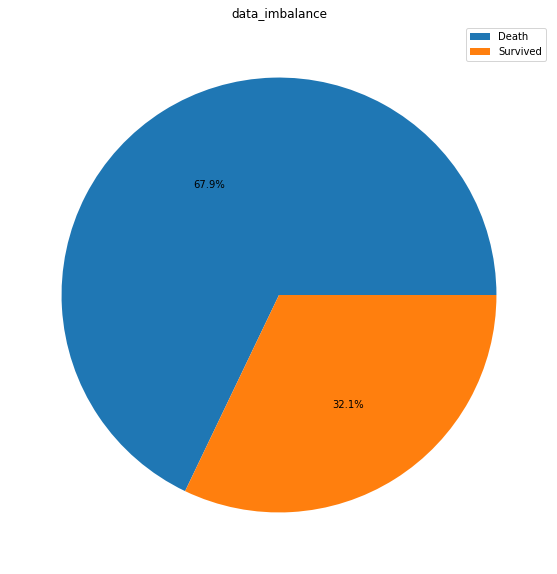

In [ ]:
dataset['DEATH_EVENT']
dead = len(dataset[dataset['DEATH_EVENT']==0])
survived = len(dataset[dataset['DEATH_EVENT']==1])

data_imbalance_stat = [dead , survived]

fig0 , (ax0) = plt.subplots(1,1 ,figsize = (10,10))
ax0.pie (data_imbalance_stat,autopct='%1.1f%%')
ax0.set_title('data_imbalance')
plt.legend(['Death' ,'Survived'])

**Data_imbalance_stat :**
- 68% data belong to death class 
- 32 % data belong to survived class.

`So , there is a clear indication of data imabalnce` 

# Visualizing effects of categorical features on Death Event

83 46 120 50


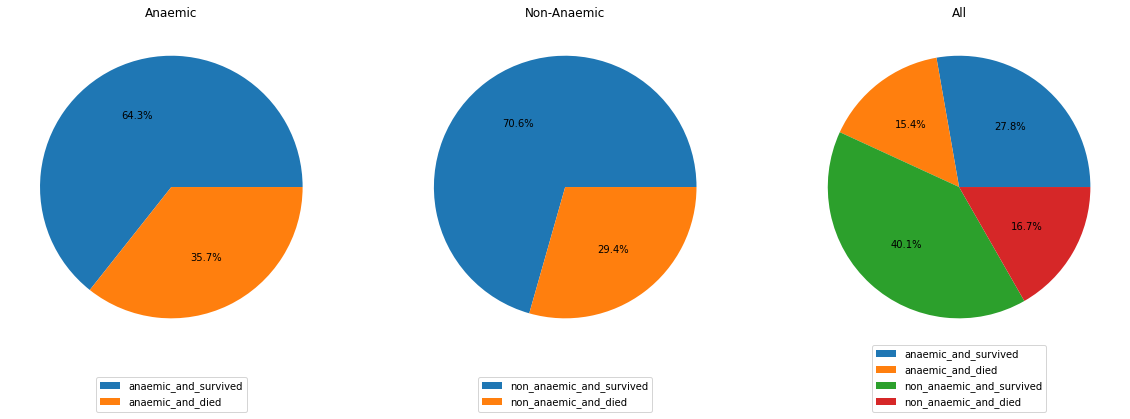

In [ ]:
# Anaemia (1 = Anaemic, 0 = Non-Anaemic)

anaemic_and_survived = len(dataset[(dataset['anaemia']==1) & (dataset['DEATH_EVENT']==0)])
anaemic_and_died = len(dataset[(dataset['anaemia']==1) & (dataset['DEATH_EVENT']==1)])
non_anaemic_and_survived = len(dataset[(dataset['anaemia']==0) & (dataset['DEATH_EVENT']==0)])
non_anaemic_and_died = len(dataset[(dataset['anaemia']==0) & (dataset['DEATH_EVENT']==1)])

anaemia_stats = [anaemic_and_survived, anaemic_and_died, non_anaemic_and_survived, non_anaemic_and_died]
anaemia_labels = ['anaemic_and_survived', 'anaemic_and_died', 'non_anaemic_and_survived', 'non_anaemic_and_died']

print(anaemic_and_survived, anaemic_and_died, non_anaemic_and_survived, non_anaemic_and_died)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,20))

ax1.pie(anaemia_stats[0:2], autopct='%1.1f%%')
ax1.set_title('Anaemic')
ax1.legend(anaemia_labels[0:2], loc='lower center', bbox_to_anchor=(0.5, -0.2))

ax2.pie(anaemia_stats[2:], autopct='%1.1f%%')
ax2.set_title('Non-Anaemic')
ax2.legend(anaemia_labels[2:], loc='lower center', bbox_to_anchor=(0.5, -0.2))

ax3.pie(anaemia_stats, autopct='%1.1f%%')
ax3.set_title('All')
ax3.legend(anaemia_labels, loc='lower center', bbox_to_anchor=(0.5, -0.2))

plt.show()

85 40 118 56


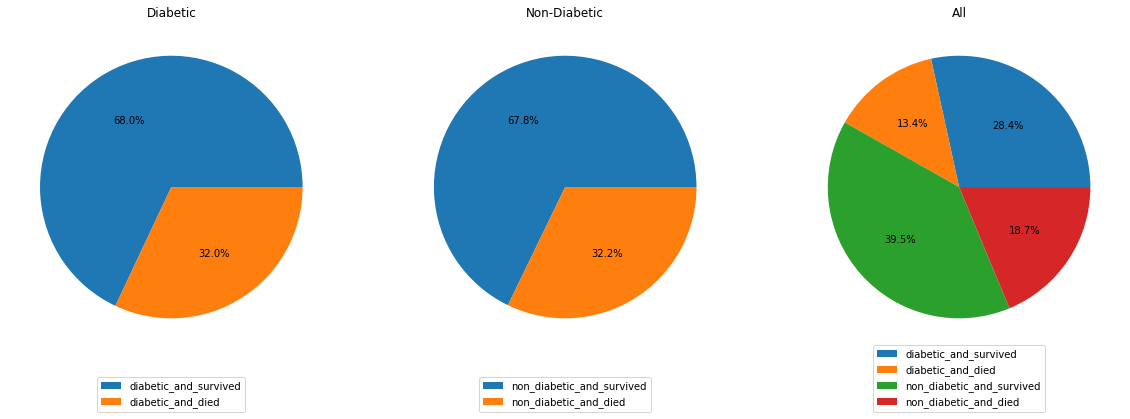

In [ ]:
# Diabetes (1 = Diabetic, 0 = Non-Diabetic)

diabetic_and_survived = len(dataset[(dataset['diabetes']==1) & (dataset['DEATH_EVENT']==0)])
diabetic_and_died = len(dataset[(dataset['diabetes']==1) & (dataset['DEATH_EVENT']==1)])
non_diabetic_and_survived = len(dataset[(dataset['diabetes']==0) & (dataset['DEATH_EVENT']==0)])
non_diabetic_and_died = len(dataset[(dataset['diabetes']==0) & (dataset['DEATH_EVENT']==1)])

diabetes_stats = [diabetic_and_survived, diabetic_and_died, non_diabetic_and_survived, non_diabetic_and_died]
diabetes_labels = ['diabetic_and_survived', 'diabetic_and_died', 'non_diabetic_and_survived', 'non_diabetic_and_died']

print(diabetic_and_survived, diabetic_and_died, non_diabetic_and_survived, non_diabetic_and_died)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,20))

ax1.pie(diabetes_stats[0:2], autopct='%1.1f%%')
ax1.set_title('Diabetic')
ax1.legend(diabetes_labels[0:2], loc='lower center', bbox_to_anchor=(0.5, -0.2))

ax2.pie(diabetes_stats[2:], autopct='%1.1f%%')
ax2.set_title('Non-Diabetic')
ax2.legend(diabetes_labels[2:], loc='lower center', bbox_to_anchor=(0.5, -0.2))

ax3.pie(diabetes_stats, autopct='%1.1f%%')
ax3.set_title('All')
ax3.legend(diabetes_labels, loc='lower center', bbox_to_anchor=(0.5, -0.2))

plt.show()

66 39 137 57


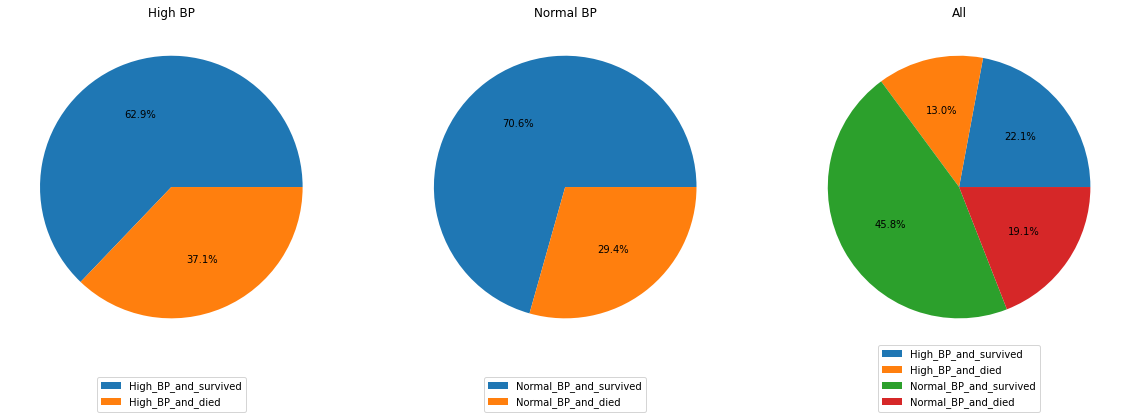

In [ ]:
# High Blood Presure (1 = High BP, 0 = Normal BP)

High_BP__and_survived = len(dataset[(dataset['high_blood_pressure']==1) & (dataset['DEATH_EVENT']==0)])
High_BP__and_died = len(dataset[(dataset['high_blood_pressure']==1) & (dataset['DEATH_EVENT']==1)])
Normal_BP__and_survived = len(dataset[(dataset['high_blood_pressure']==0) & (dataset['DEATH_EVENT']==0)])
Normal_BP__and_died = len(dataset[(dataset['high_blood_pressure']==0) & (dataset['DEATH_EVENT']==1)])

BP_stats = [High_BP__and_survived, High_BP__and_died, Normal_BP__and_survived, Normal_BP__and_died]
BP_labels = ['High_BP_and_survived', 'High_BP_and_died', 'Normal_BP_and_survived', 'Normal_BP_and_died']

print(High_BP__and_survived, High_BP__and_died, Normal_BP__and_survived, Normal_BP__and_died)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,20))

ax1.pie(BP_stats[0:2], autopct='%1.1f%%')
ax1.set_title('High BP')
ax1.legend(BP_labels[0:2], loc='lower center', bbox_to_anchor=(0.5, -0.2))

ax2.pie(BP_stats[2:], autopct='%1.1f%%')
ax2.set_title('Normal BP')
ax2.legend(BP_labels[2:], loc='lower center', bbox_to_anchor=(0.5, -0.2))

ax3.pie(BP_stats, autopct='%1.1f%%')
ax3.set_title('All')
ax3.legend(BP_labels, loc='lower center', bbox_to_anchor=(0.5, -0.2))

plt.show()

BP data facts :

- around 46% who has normal blood pressure , they have survived
- 2.1 % who ha high BP , they has also survived .

132 62 71 34


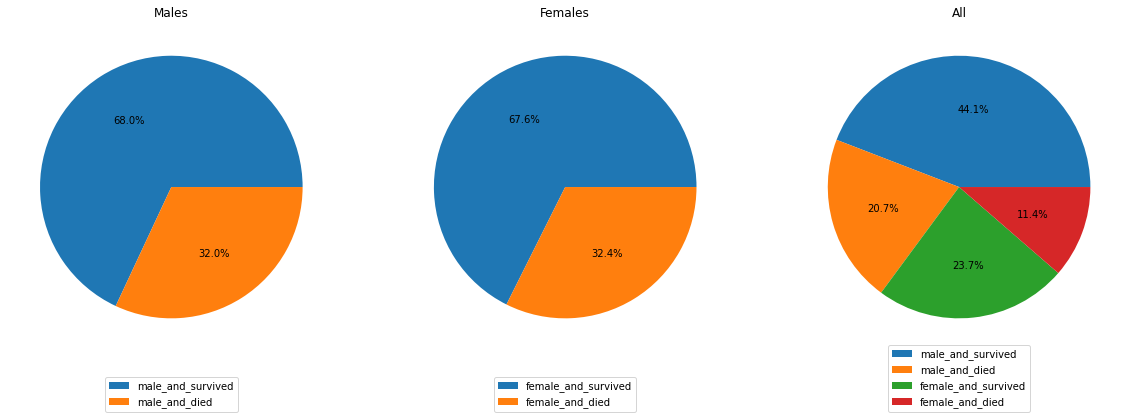

In [ ]:
# Gender (male = 1, female = 0)

male_and_survived = len(dataset[(dataset['sex']==1) & (dataset['DEATH_EVENT']==0)])
male_and_died = len(dataset[(dataset['sex']==1) & (dataset['DEATH_EVENT']==1)])
female_and_survived = len(dataset[(dataset['sex']==0) & (dataset['DEATH_EVENT']==0)])
female_and_died = len(dataset[(dataset['sex']==0) & (dataset['DEATH_EVENT']==1)])

gender_stats = [male_and_survived, male_and_died, female_and_survived, female_and_died]
gender_labels = ['male_and_survived', 'male_and_died', 'female_and_survived', 'female_and_died']

print(male_and_survived, male_and_died, female_and_survived, female_and_died)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,20))

ax1.pie(gender_stats[0:2], autopct='%1.1f%%')
ax1.set_title('Males')
ax1.legend(gender_labels[0:2], loc='lower center', bbox_to_anchor=(0.5, -0.2))

ax2.pie(gender_stats[2:], autopct='%1.1f%%')
ax2.set_title('Females')
ax2.legend(gender_labels[2:], loc='lower center', bbox_to_anchor=(0.5, -0.2))

ax3.pie(gender_stats, autopct='%1.1f%%')
ax3.set_title('All')
ax3.legend(gender_labels, loc='lower center', bbox_to_anchor=(0.5, -0.2))

plt.show()

66 30 137 66


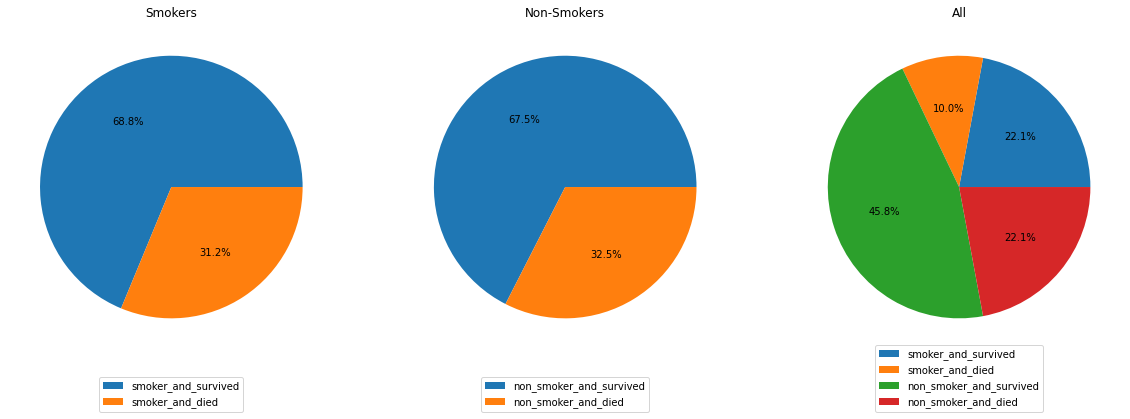

In [ ]:
# Smoking (smoker = 1, non-smoker = 0)

smoker_and_survived = len(dataset[(dataset['smoking']==1) & (dataset['DEATH_EVENT']==0)])
smoker_and_died = len(dataset[(dataset['smoking']==1) & (dataset['DEATH_EVENT']==1)])
non_smoker_and_survived = len(dataset[(dataset['smoking']==0) & (dataset['DEATH_EVENT']==0)])
non_smoker_and_died = len(dataset[(dataset['smoking']==0) & (dataset['DEATH_EVENT']==1)])

smoking_stats = [smoker_and_survived, smoker_and_died, non_smoker_and_survived, non_smoker_and_died]
smoking_labels = ['smoker_and_survived', 'smoker_and_died', 'non_smoker_and_survived', 'non_smoker_and_died']

print(smoker_and_survived, smoker_and_died, non_smoker_and_survived, non_smoker_and_died)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,20))

ax1.pie(smoking_stats[0:2], autopct='%1.1f%%')
ax1.set_title('Smokers')
ax1.legend(smoking_labels[0:2], loc='lower center', bbox_to_anchor=(0.5, -0.2))

ax2.pie(smoking_stats[2:], autopct='%1.1f%%')
ax2.set_title('Non-Smokers')
ax2.legend(smoking_labels[2:], loc='lower center', bbox_to_anchor=(0.5, -0.2))

ax3.pie(smoking_stats, autopct='%1.1f%%', )
ax3.set_title('All')
ax3.legend(smoking_labels, loc='lower center', bbox_to_anchor=(0.5, -0.2))

plt.show()

Smoking effect data facts :

- Those who are non-smoker , they have  a chance of 67.5% to be survived .

- Among smokers , they have a chance of 68.8% to be survived .

# Visualizing effects of non-categorical features on death event

In [ ]:
# Age 
age_data = [dataset["age"].values]
fig0 = ff.create_distplot(age_data, ['age'])
fig0.update_layout(title_text = 'Age Distribution plot')
fig0.show()

In [ ]:
# Age Spread according to Gender
fig1 = px.box(dataset, x='sex', y='age', points="all")
fig1.update_layout(title_text = "Gender wise Age Spread : Male = 1 Female = 0")
fig1.show()

In [ ]:
# Analysis of Age on Survival Status
hist_data = [dataset[dataset["DEATH_EVENT"]==0]["age"], dataset[dataset["DEATH_EVENT"]==1]["age"]]
fig2 = ff.create_distplot(hist_data, ['Survived', 'Not Survived'], bin_size=0.5)
fig2.update_layout(title_text = "Analysis of Age on Survival Status")
fig2.show()

In [ ]:
# Analysis of Age and Gender on Survival Status
fig3 = px.violin(dataset, y = "age", x = "sex", color = "DEATH_EVENT", box = True, points = "all", hover_data = dataset.columns)
fig3.update_layout(title_text = "Analysis of Age and Gender on Survival Status")
fig3.show()

In [ ]:
# Effect of age and smoking on death event
fig4 = px.violin(dataset, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all", hover_data=dataset.columns)
fig4.update_layout(title_text="Analysis of Age and Smoking on Survival Status")
fig4.show()

In [ ]:
# Effect of diabetes and age on Death Event
fig5 = px.violin(dataset, y="age", x="diabetes", color="DEATH_EVENT", box=True, points="all", hover_data=dataset.columns)
fig5.update_layout(title_text="Analysis in Age and Diabetes on Survival Status (0 = non-diabetic, 1 = dabetic)")
fig5.show()

In [ ]:
# Effect of Age and Blood Pressure on Death Event
fig6 = px.violin(dataset, y="age", x="high_blood_pressure", color="DEATH_EVENT", box=True, points="all", hover_data=dataset.columns)
fig6.update_layout(title_text="Analysis in Age and Blood Pressure on Survival Status (0 = Normal BP, 1 = High BP)")
fig6.show()

In [ ]:
# Effect of Anaemia and Age on Death Event
fig7 = px.violin(dataset, y="age", x="anaemia", color="DEATH_EVENT", box=True, points="all", hover_data=dataset.columns)
fig7.update_layout(title_text="Analysis of Age and Anaemia on Survival Status (0 = non-anaemic, 1 = anaemic)")
fig7.show()

In [ ]:
# Effect of creatinine_phosphokinase on Death Event
fig8 = px.histogram(dataset, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns)
fig8.update_layout(title_text = 'Analysis of creatine phosphokinase on survival status')
fig8.show()

In [ ]:
# Effect of platelets on Death Event
fig9 = px.histogram(dataset, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns)
fig9.update_layout(title_text = 'Analysis of Platelets on survival status')
fig9.show()

In [ ]:
# Effect of ejection fraction on Death Event
fig10 = px.histogram(dataset, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns)
fig10.update_layout(title_text = 'Analysis of Ejection Fraction on survival status')
fig10.show()

In [ ]:
# Effect of Serum Creatinine on Death Event
fig11 = px.histogram(dataset, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns)
fig11.update_layout(title_text = 'Analysis of Serum Creatinine on survival status')
fig11.show()

In [ ]:
# Effect of Serum Sodium on Death Event
fig12 = px.histogram(dataset, x="serum_sodium", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns)
fig12.update_layout(title_text = 'Analysis of Serum Sodium on survival status')
fig12.show()

# Data Modelling

In [ ]:
columns = list(dataset.columns)
print(*columns, sep='\n')
# print('\n'.join(columns)) Gives the same result...

age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
DEATH_EVENT


In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
x.shape ,y.shape

((299, 12), (299,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, shuffle = True, random_state = 2)

In [ ]:
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 
"""

'\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nx_train = sc.fit_transform(x_train)\nx_test = sc.transform(x_test) \n'

# Machine Learning Algorithms

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

algo_accuracy_record = []  # each element is list of format - ['algo_name', algo_max_accuracy]

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_acc = []
rf_cm = []

for num_trees in range(1, 200):
    rf_classifier = RandomForestClassifier(n_estimators = num_trees, criterion = 'entropy', random_state = 0)
    rf_classifier.fit(x_train, y_train)
    rf_pred = rf_classifier.predict(x_test)

    rf_acc.append(accuracy_score(y_test,rf_pred))
    rf_cm.append(confusion_matrix(y_test,rf_pred))
    
max_acc = max(rf_acc)
max_acc_cm = rf_cm[rf_acc.index(max_acc)]
print('maximum accuracy = ' + str(max_acc))
print('confusion matrix = ')
print(max_acc_cm)
algo_accuracy_record.append(['RandomForestClassifier', max_acc])
# 0.933 without sc

maximum accuracy = 0.95
confusion matrix = 
[[43  0]
 [ 3 14]]


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_acc = []
dt_cm = []

dt_classifier = DecisionTreeClassifier(criterion = 'entropy')
for i in range(20):
    dt_classifier.fit(x_train[:,[3,4,7,11]], y_train)
    dt_pred = dt_classifier.predict(x_test[:,[3,4,7,11]])

    dt_acc.append(accuracy_score(y_test, dt_pred))
    dt_cm.append(confusion_matrix(y_test, dt_pred))
    
max_acc = max(dt_acc)
max_acc_cm = dt_cm[dt_acc.index(max_acc)]

print('maximum accuracy = ' + str(max_acc))
print('confusion matrix = ')
print(max_acc_cm)
algo_accuracy_record.append(['DecisionTreeClassifier', max_acc])
# 0.855 without sc

maximum accuracy = 0.8166666666666667
confusion matrix = 
[[37  6]
 [ 5 12]]


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state = 2)
lr_classifier.fit(x_train[:,[4,7,8,11]], y_train)
lr_pred = lr_classifier.predict(x_test[:,[4,7,8,11]])

lr_acc = accuracy_score(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

print('accuracy = ' + str(lr_acc))
print('confusion matrix = ')
print(lr_cm)
algo_accuracy_record.append(['LogisticRegresion', lr_acc])
# 0.888 without sc

accuracy = 0.9166666666666666
confusion matrix = 
[[41  2]
 [ 3 14]]


In [ ]:
# Support Vector Classifier
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0)
svc_classifier.fit(x_train[:,[1,4,7,11]], y_train)
svc_pred = svc_classifier.predict(x_test[:,[1,4,7,11]])
svc_acc = accuracy_score(y_test, svc_pred)
svc_cm = confusion_matrix(y_test, svc_pred)
print(svc_acc)
print(svc_cm)
algo_accuracy_record.append(['SupportVectorClassifier', svc_acc])
# 0.9 without sc

0.9
[[43  0]
 [ 6 11]]


In [ ]:
# K-Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_acc = []
knn_cm = []

# using StandardScalar for K-NN generates better results
from sklearn.preprocessing import StandardScaler
k_x_train = x_train
k_y_train = y_train
k_x_test = x_test
k_y_test = y_test
k_sc = StandardScaler()
k_x_train = k_sc.fit_transform(k_x_train)
k_x_test = k_sc.transform(k_x_test)

for num_neighbours in range(1, 20):
    knn_classifier = KNeighborsClassifier(n_neighbors=num_neighbours, metric='minkowski', p=2)
    knn_classifier.fit(k_x_train[:,[4,7,11]], k_y_train)

    knn_pred = knn_classifier.predict(k_x_test[:,[4,7,11]])

    knn_acc.append(accuracy_score(k_y_test, knn_pred))
    knn_cm.append(confusion_matrix(k_y_test, knn_pred))

max_acc = max(knn_acc)
max_acc_cm = knn_cm[knn_acc.index(max_acc)]

print('maximum accuracy = ' + str(max_acc))
print('confusion matrix = ')
print(max_acc_cm)
algo_accuracy_record.append(['K-NNClassifier', max_acc])
# 0.9333 with sc

maximum accuracy = 0.95
confusion matrix = 
[[42  1]
 [ 2 15]]


In [ ]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(x_train[:,[4,6,7,8,11]], y_train)
nb_pred = nb_classifier.predict(x_test[:,[4,6,7,8,11]])

nb_acc = accuracy_score(y_test, nb_pred)
nb_cm = confusion_matrix(y_test, nb_pred)

print('maximum accuracy = ' + str(nb_acc))
print('confusion matrix = ')
print(nb_cm)
algo_accuracy_record.append(['NaiveBayesClassifier', nb_acc])
# 0.866 without sc

maximum accuracy = 0.9166666666666666
confusion matrix = 
[[41  2]
 [ 3 14]]


In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(max_depth=2, random_state=1)
gb_classifier.fit(x_train[:, [4,7,11]], y_train)
gb_pred = gb_classifier.predict(x_test[:, [4,7,11]])

gb_acc = accuracy_score(y_test, gb_pred)
gb_cm = confusion_matrix(y_test, gb_pred)

print('maximum accuracy = ' + str(gb_acc))
print('confusion matrix = ')
print(gb_cm)
algo_accuracy_record.append(['GradientBoostingClassifier', gb_acc])
# 0.911 without sc

maximum accuracy = 0.9333333333333333
confusion matrix = 
[[42  1]
 [ 3 14]]


In [ ]:
# XGBRF Classifier
from xgboost import XGBRFClassifier

xgb_classifier = XGBRFClassifier(max_depth=3, random_state=1)
xgb_classifier.fit(x_train[:, [3,4,7,11]], y_train)
xgb_pred = xgb_classifier.predict(x_test[:, [3,4,7,11]])

xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)

print('maximum accuracy = ' + str(xgb_acc))
print('confusion matrix = ')
print(xgb_cm)
algo_accuracy_record.append(['XGBRFClassifier', gb_acc])
# 0.911 without sc

maximum accuracy = 0.9333333333333333
confusion matrix = 
[[43  0]
 [ 4 13]]


In [ ]:
# LGBM Classifier
from lightgbm import LGBMClassifier

lg_classifier = LGBMClassifier(max_depth=2, random_state=4)
lg_classifier.fit(x_train[:,[3,4,7,8,11]], y_train)
lg_pred = lg_classifier.predict(x_test[:,[3,4,7,8,11]])

lg_acc = accuracy_score(y_test, lg_pred)
lg_cm = confusion_matrix(y_test, lg_pred)

print('maximum accuracy = ' + str(lg_acc))
print('confusion matrix = ')
print(lg_cm)
algo_accuracy_record.append(['LGBMClassifier', lg_acc])
# 0.911 without sc

maximum accuracy = 0.9333333333333333
confusion matrix = 
[[42  1]
 [ 3 14]]


In [ ]:
# CatBoost Classifier 
! pip install catboost
from catboost import CatBoostClassifier

cat_classifier = CatBoostClassifier()
cat_classifier .fit(x_train[:,[4,7,11]], y_train)
cat_pred = cat_classifier.predict(x_test[:,[4,7,11]])

cat_acc = accuracy_score(y_test, cat_pred)
cat_cm = confusion_matrix(y_test, cat_pred)

print('maximum accuracy = ' + str(cat_acc))
print('confusion matrix = ')
print(cat_cm)
algo_accuracy_record.append(['CatBoostClassifier', cat_acc])
# 0.911 without sc

     |████████████████████████████████| 69.2MB 41kB/s 
Learning rate set to 0.005591
0:	learn: 0.6887271	total: 49.3ms	remaining: 49.3s
1:	learn: 0.6840658	total: 50.1ms	remaining: 25s
2:	learn: 0.6795705	total: 50.8ms	remaining: 16.9s
3:	learn: 0.6749762	total: 51.5ms	remaining: 12.8s
4:	learn: 0.6706130	total: 52.2ms	remaining: 10.4s
5:	learn: 0.6666786	total: 52.8ms	remaining: 8.75s
6:	learn: 0.6626120	total: 53.5ms	remaining: 7.59s
7:	learn: 0.6584635	total: 54.2ms	remaining: 6.71s
8:	learn: 0.6544830	total: 54.8ms	remaining: 6.03s
9:	learn: 0.6505914	total: 55.5ms	remaining: 5.49s
10:	learn: 0.6469867	total: 56.1ms	remaining: 5.04s
11:	learn: 0.6425373	total: 56.7ms	remaining: 4.67s
12:	learn: 0.6400655	total: 57.1ms	remaining: 4.34s
13:	learn: 0.6362043	total: 57.7ms	remaining: 4.07s
14:	learn: 0.6323275	total: 58.4ms	remaining: 3.83s
15:	learn: 0.6289671	total: 59.1ms	remaining: 3.63s
16:	learn: 0.6248773	total: 59.7ms	remaining: 3.45s
17:	learn: 0.6208649	total: 60.4ms	remainin

In [ ]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

et_classifier = ExtraTreesClassifier(n_estimators = 1000, max_depth=6, ccp_alpha=0.01)
et_classifier.fit(x_train[:,[3,4,7,8,11]], y_train)

et_pred = et_classifier.predict(x_test[:,[3,4,7,8,11]])

et_acc = accuracy_score(y_test, et_pred)
et_cm = confusion_matrix(y_test, et_pred)

print('maximum accuracy = ' + str(et_acc))
print('confusion matrix = ')
print(et_cm)
algo_accuracy_record.append(['ExtraTreesClassifier', et_acc])
# 0.911 without sc

maximum accuracy = 0.9166666666666666
confusion matrix = 
[[42  1]
 [ 4 13]]


In [ ]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

ad_clf = AdaBoostClassifier(n_estimators = 1000, learning_rate=0.001)
ad_clf.fit(x_train[:,[4,7,11]], y_train)
ad_pred = ad_clf.predict(x_test[:,[4,7,11]])

ad_acc = accuracy_score(y_test, ad_pred)
ad_cm = confusion_matrix(y_test, ad_pred)

print('maximum accuracy = ' + str(ad_acc))
print('confusion matrix = ')
print(ad_cm)
algo_accuracy_record.append(['AdaBoostClassifier', ad_acc])
# 0.9 without sc

maximum accuracy = 0.9
confusion matrix = 
[[43  0]
 [ 6 11]]


In [ ]:
algo_accuracy_record

[['RandomForestClassifier', 0.95],
 ['DecisionTreeClassifier', 0.8166666666666667],
 ['LogisticRegresion', 0.9166666666666666],
 ['SupportVectorClassifier', 0.9],
 ['K-NNClassifier', 0.95],
 ['NaiveBayesClassifier', 0.9166666666666666],
 ['GradientBoostingClassifier', 0.9333333333333333],
 ['XGBRFClassifier', 0.9333333333333333],
 ['LGBMClassifier', 0.9333333333333333],
 ['CatBoostClassifier', 0.9333333333333333],
 ['ExtraTreesClassifier', 0.9166666666666666],
 ['AdaBoostClassifier', 0.9]]

# Deep Learning


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras

init = keras.initializers.RandomNormal(seed=1)
act = keras.layers.LeakyReLU(alpha=0.3)

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, shuffle = True, random_state = 2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

model = Sequential()

model.add(Dense(units = 12, kernel_initializer = init, activation = act, input_dim = 12))

model.add(Dropout(1/3))

model.add(Dense(units = 12, kernel_initializer = init, activation = act))

model.add(Dropout(1/3))

model.add(Dense(units = 8, kernel_initializer = init, activation = act))

model.add(Dropout(0.5))

model.add(Dense(units = 8, kernel_initializer = init, activation = 'tanh'))

model.add(Dropout(0.5))

model.add(Dense(units = 4, kernel_initializer = init, activation = 'tanh'))

model.add(Dropout(0.5))

model.add(Dense(units = 4, kernel_initializer = init, activation = 'tanh'))

model.add(Dense(units = 1, kernel_initializer = init, activation = 'sigmoid'))

model.compile(optimizer = 'adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size = len(x_train), epochs = 1000)

nn_pred = model.predict(x_test)
for i in range(len(nn_pred)):
    if(nn_pred[i] > 0.5):
        nn_pred[i] = 1
    else:
        nn_pred[i] = 0
nn_acc = accuracy_score(y_test, nn_pred)
print('neural network accuracy = ' + str(nn_acc))
print('neural network confuson matrix:')
print(confusion_matrix(y_test, nn_pred))

Epoch 1/1000
1/1 [==============================] - 16s 16s/step - loss: 0.6931 - accuracy: 0.5732
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.6695
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.6928 - accuracy: 0.6695
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6926 - accuracy: 0.6695
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6924 - accuracy: 0.6695
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.6922 - accuracy: 0.6695
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6920 - accuracy: 0.6695
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6918 - accuracy: 0.6695
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6916 - accuracy: 0.6695
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6914 - accuracy: 0.6695
Epoch 11/1000
1

In [ ]:
algo_accuracy_record.append(['Neural Network', nn_acc])

## Summary

In [ ]:
algo_accuracy_record

[['RandomForestClassifier', 0.95],
 ['DecisionTreeClassifier', 0.8166666666666667],
 ['LogisticRegresion', 0.9166666666666666],
 ['SupportVectorClassifier', 0.9],
 ['K-NNClassifier', 0.95],
 ['NaiveBayesClassifier', 0.9166666666666666],
 ['GradientBoostingClassifier', 0.9333333333333333],
 ['XGBRFClassifier', 0.9333333333333333],
 ['LGBMClassifier', 0.9333333333333333],
 ['CatBoostClassifier', 0.9333333333333333],
 ['ExtraTreesClassifier', 0.9166666666666666],
 ['AdaBoostClassifier', 0.9],
 ['Neural Network', 0.8666666666666667]]

Highest accuracy was achieved by Random Forest Classifier and K-NN Classifier

In [ ]:
algo_acc = np.transpose(algo_accuracy_record)
x_plot = algo_acc[0]
y_plot = np.round(np.array(algo_acc[1], dtype=np.float32)*100, 2)

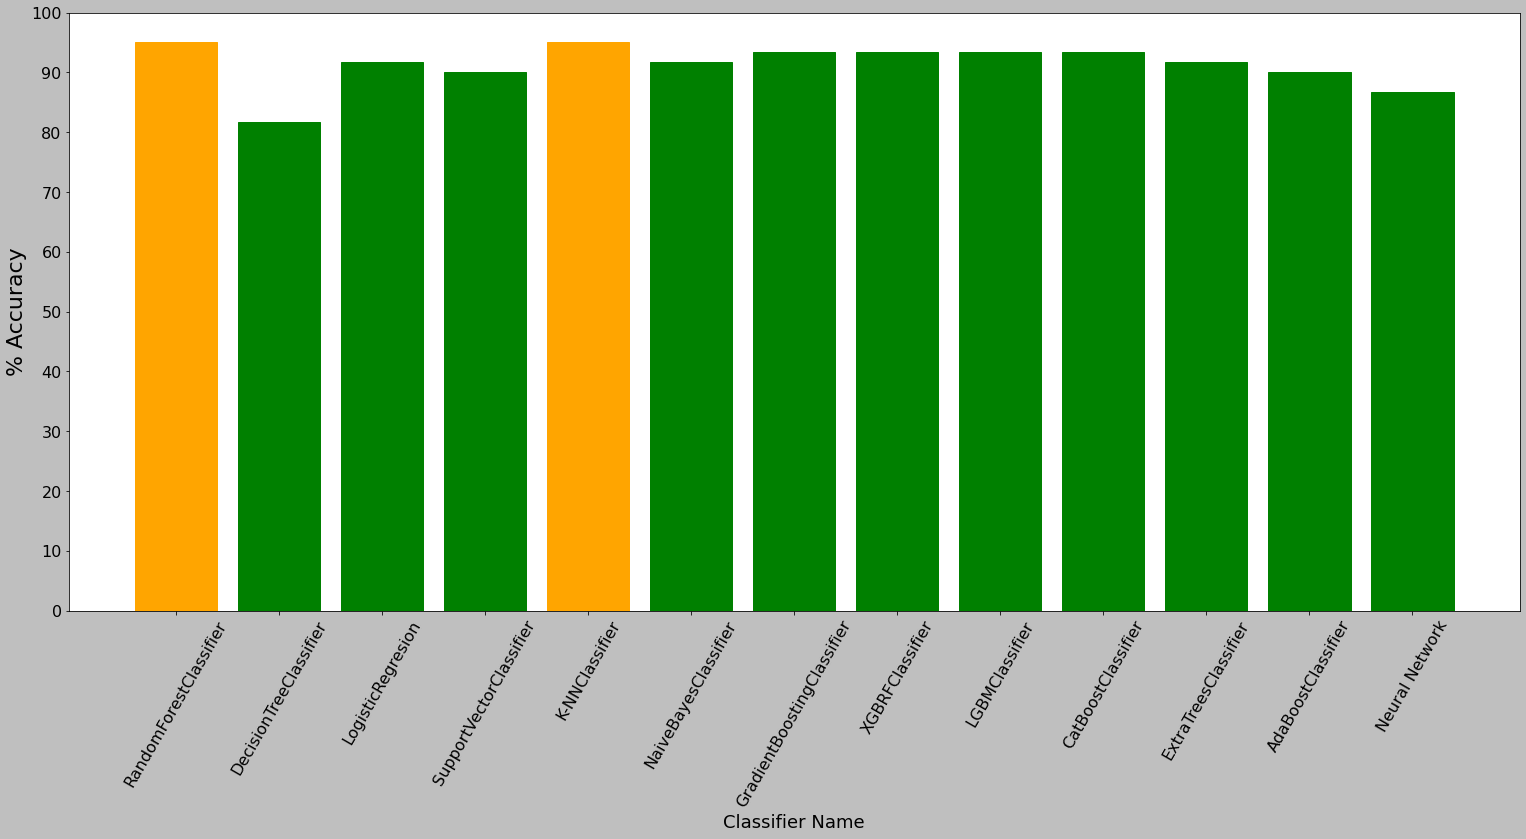

In [ ]:
# We plot bar graphs of accuracies of all models and highlight the models with maximum accuracy in orange color.
fig = plt.figure(figsize=(26,11))
barlist = plt.bar(x_plot,y_plot)
for i in range(len(barlist)):
    if (y_plot[i] == max(y_plot)):
        barlist[i].set_color('orange')
    else:
        barlist[i].set_color('g')
plt.xlabel('Classifier Name', fontsize = 18)
plt.ylabel('% Accuracy', fontsize = 22)
plt.xticks(x_plot, fontsize = 16)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100], fontsize = 16)
plt.xticks(rotation = 60)
# plt.grid(True).0s 6ms/step - loss: 0.4076 - accuracy: 0.8494
plt.style.use(plt.style.available[8])
plt.show()

* ☺Dumping the model

In [ ]:
import pickle
# Saving model to disk
pickle.dump(rf_classifier, open('heart_model.pkl','wb'))